<a href="https://colab.research.google.com/github/97Bhanuprakash/Personalized-Learning-RL/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the dataset and view some insights

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Dataset

students_performance = pd.read_csv('/content/drive/MyDrive/ML/ML_Project/Students_Performance_Dataset.csv')
students_grading = pd.read_csv('/content/drive/MyDrive/ML/ML_Project/Students_Grading_Dataset_Biased.csv')

In [ ]:
#First 5 rows in student performance dataset
students_performance.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [ ]:
#Last 5 rows in student performance dataset
students_performance.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,53.5470,F,7.8,No,No,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,59.0240,F,24.2,No,Yes,NaN,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,74.7560,C,7.6,No,Yes,NaN,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,68.6585,D,14.5,Yes,No,PhD,Medium,10,5.9
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Mathematics,90.33,93.29,88.42,...,66.23,78.7485,C,29.9,Yes,Yes,PhD,High,2,5.3


In [ ]:
# Statistical Data
students_performance.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [ ]:
#Info of student performance dataset columns
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
#First 5 rows in student grading dataset
students_grading.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [ ]:
#Last 5 rows in student performance dataset
students_grading.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,83.92,83.24,53.47,...,69.25,77.86,F,29.2,No,Yes,PhD,Low,2,6.1


In [ ]:
# Statistical Data
students_grading.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [ ]:
#Info of student performance dataset columns
students_grading.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
# Remove Duplicates
cleaned_ds = students_performance.drop_duplicates()

In [ ]:
#converting cleaned_ds to csv

cleaned_ds.to_csv('/content/drive/MyDrive/ML/ML_Project/cleaned_students_performance.csv', index=False)

In [ ]:
print(cleaned_ds.columns)

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


## Data Visualization

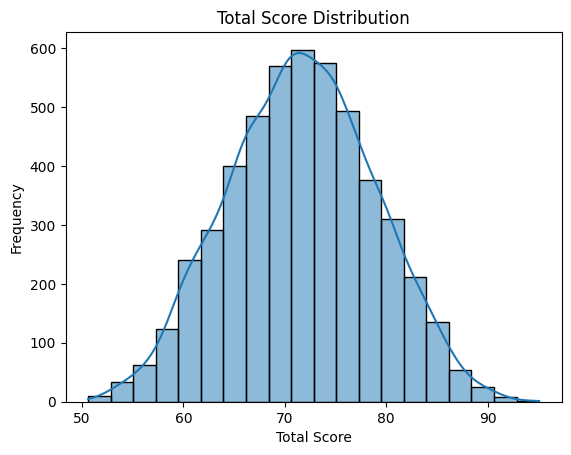

In [ ]:
# Total score distribution
sns.histplot(cleaned_ds['Total_Score'], bins=20, kde=True)
plt.title("Total Score Distribution")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

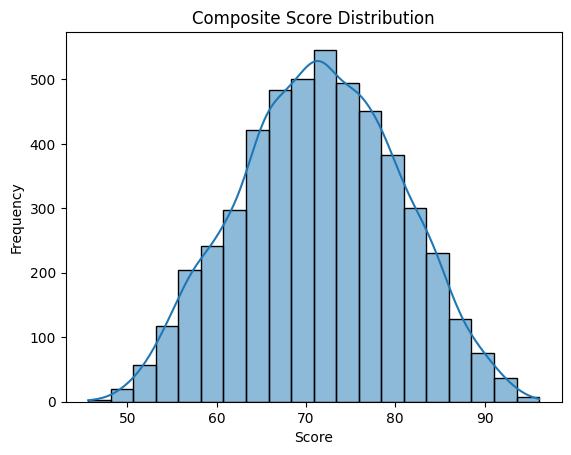

In [ ]:
cleaned_ds['Composite_Score'] = (
    cleaned_ds['Midterm_Score'] * 0.3 +
    cleaned_ds['Final_Score'] * 0.4 +
    cleaned_ds['Assignments_Avg'] * 0.1 +
    cleaned_ds['Quizzes_Avg'] * 0.1 +
    cleaned_ds['Projects_Score'] * 0.1

)

# Composite score Distribution
sns.histplot(cleaned_ds['Composite_Score'], bins=20, kde=True)
plt.title("Composite Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

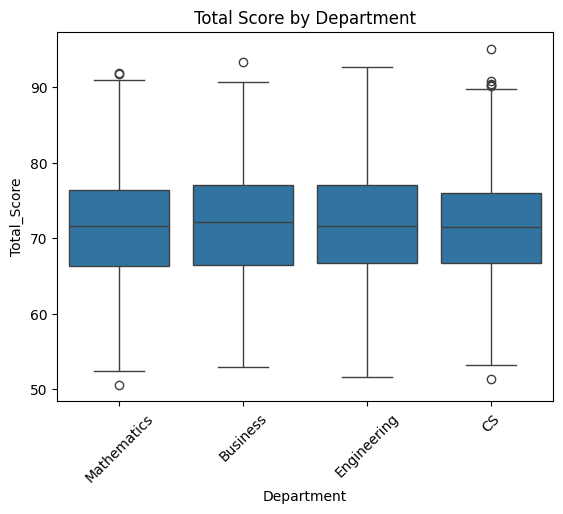

In [ ]:
# Boxplot of Total score by department
sns.boxplot(x='Department', y='Total_Score', data=cleaned_ds)
plt.title("Total Score by Department")
plt.xticks(rotation=45)
plt.show()

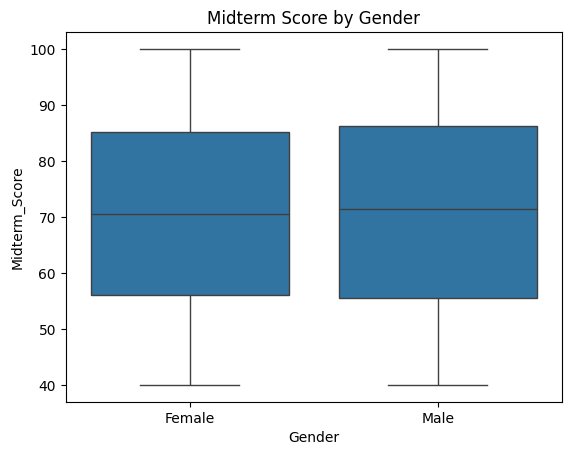

In [ ]:
# Boxplot of midterm score by Gender
sns.boxplot(x='Gender', y='Midterm_Score', data=cleaned_ds)
plt.title("Midterm Score by Gender")
plt.show()

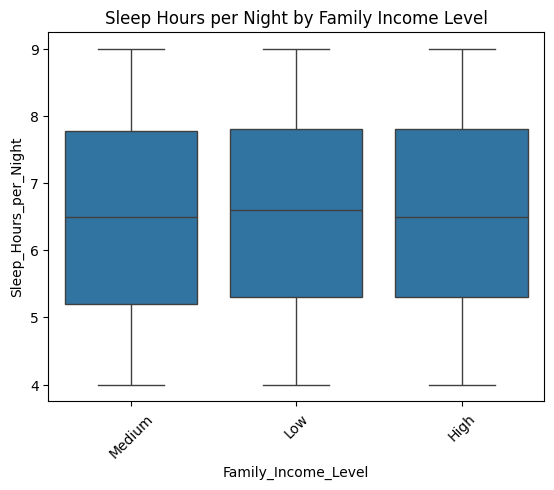

In [ ]:
# Boxplot of sleep hours by family level income
sns.boxplot(x='Family_Income_Level', y='Sleep_Hours_per_Night', data=cleaned_ds)
plt.title("Sleep Hours per Night by Family Income Level")
plt.xticks(rotation=45)
plt.show()

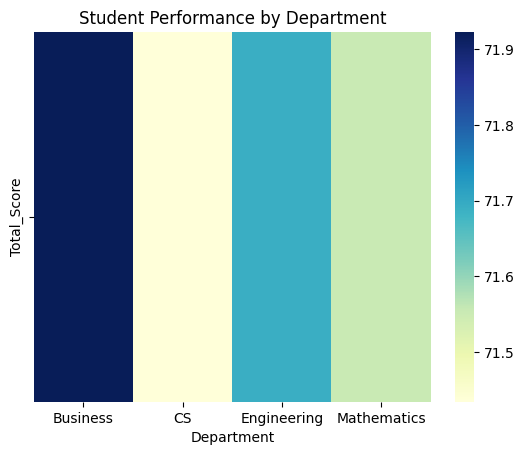

In [ ]:
pivot = cleaned_ds.pivot_table(columns='Department', values='Total_Score', aggfunc='mean')
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Student Performance by Department")
plt.show()

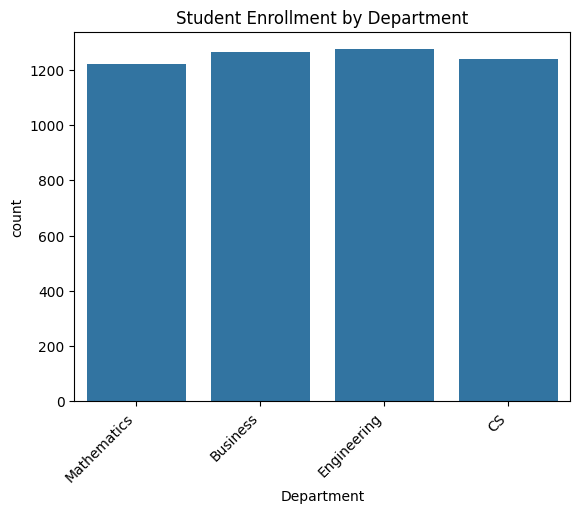

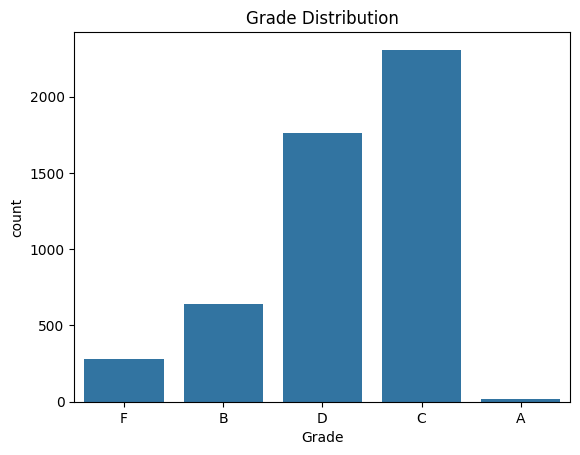

In [ ]:
# Countplot for Department (as a replacement for 'module')
sns.countplot(x='Department', data=cleaned_ds)
plt.title("Student Enrollment by Department")
plt.xticks(rotation=45, ha='right')
plt.show()

# Countplot for Attempt Number
sns.countplot(x='Grade', data=cleaned_ds)
plt.title("Grade Distribution")
plt.show()

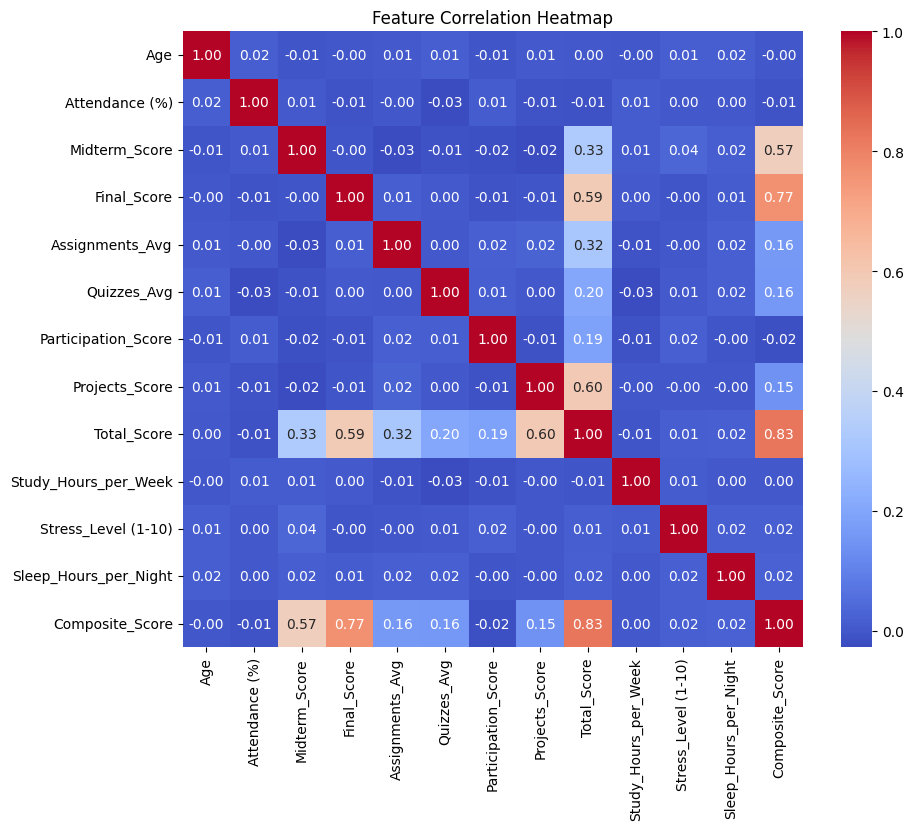

In [ ]:
# Heatmap
numeric_cols = cleaned_ds.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Preprocessing


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1: Load and prepare data
df = cleaned_ds.copy()
df = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

# 2: Encode target labels
label_encoder = LabelEncoder()
df['Grade_Label'] = label_encoder.fit_transform(df['Grade'])

# 3. X = df.drop(columns=[target_column])
X = df.drop(columns=['Grade', 'Grade_Label'])
y = df['Grade_Label']


# 4. Identify column types
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 5. Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

# 6. Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Convert to pandas DataFrame if needed
import pandas as pd
X_train_df = pd.DataFrame(X_train.toarray() if hasattr(X_train, "toarray") else X_train)
X_test_df = pd.DataFrame(X_test.toarray() if hasattr(X_test, "toarray") else X_test)

## Logistic Regression

Training Metrics: {'Accuracy': 0.911, 'Precision': 0.912825533226885, 'Recall': 0.911, 'F1 Score': 0.9059554934256284}
Test Metrics: {'Accuracy': 0.915, 'Precision': 0.9169109505280711, 'Recall': 0.915, 'F1 Score': 0.9092753060286513}


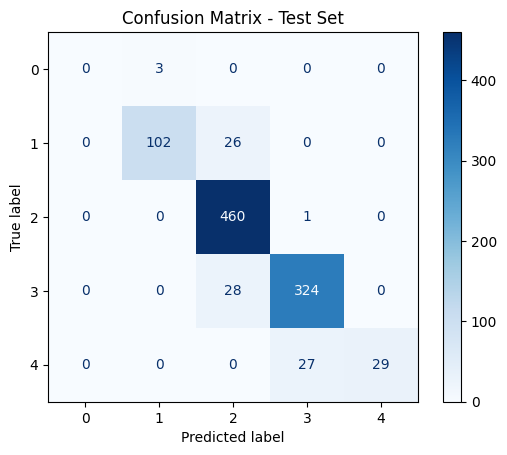

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Wrap logistic regression with OneVsRestClassifier
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
log_reg.fit(X_train, y_train)

# Predict
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Metrics function
def get_metrics(y_true, y_pred):
    average_type = 'binary' if len(np.unique(y_true)) == 2 else 'weighted'
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average_type, zero_division=0),
        "Recall": recall_score(y_true, y_pred, average=average_type, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average=average_type, zero_division=0)
    }

# Print metrics
print("Training Metrics:", get_metrics(y_train, y_train_pred))
print("Test Metrics:", get_metrics(y_test, y_test_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

### Random Forest Classifier

Training Metrics: {'Accuracy': 0.911, 'Precision': 0.912825533226885, 'Recall': 0.911, 'F1 Score': 0.9059554934256284}
Test Metrics: {'Accuracy': 0.915, 'Precision': 0.9169109505280711, 'Recall': 0.915, 'F1 Score': 0.9092753060286513}


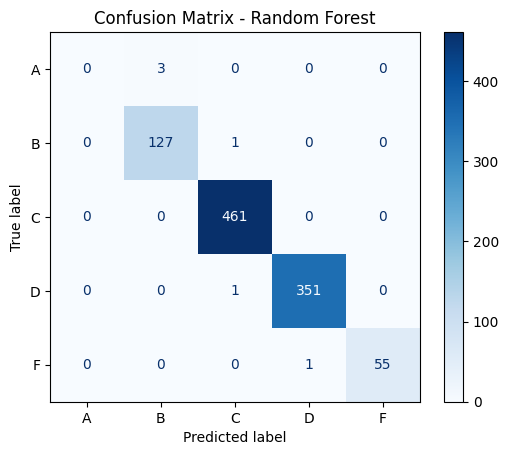

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load and clean data
df = cleaned_ds.copy()
df = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

# Step 2: Encode target labels
label_encoder = LabelEncoder()
df['Grade_Label'] = label_encoder.fit_transform(df['Grade'])

# Step 3: Features and target
X = df.drop(columns=['Grade', 'Grade_Label'])
y = df['Grade_Label']

# Step 4: Define column types
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities',
                    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']
numerical_cols = list(set(X.columns) - set(categorical_cols))

# Step 5: Pipelines for preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 6: Final model pipeline with Random Forest
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 8: Fit the model
rf_model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = rf_model.predict(X_test)

# Print metrics
print("Training Metrics:", get_metrics(y_train, y_train_pred))
print("Test Metrics:", get_metrics(y_test, y_test_pred))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Define Environment and DQN Model

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Separate features and target
X = df.drop(columns=["Grade"])
y = df["Grade"]

# Label encode target if needed
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)

# Preprocess: numerical + categorical
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_processed = preprocessor.fit_transform(X)
X_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)
y = pd.Series(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

In [ ]:
# Environment simulating student prediction task
class StudentEnv:
    def __init__(self, X, y):
        self.X = X.reset_index(drop=True) if hasattr(X, 'reset_index') else X
        self.y = y.reset_index(drop=True) if hasattr(y, 'reset_index') else y
        self.idx = 0

    def reset(self):
        self.idx = 0
        return self.X.iloc[self.idx] if hasattr(self.X, 'iloc') else self.X[self.idx]

    def step(self, action):
        correct = int(action == (self.y.iloc[self.idx] if hasattr(self.y, 'iloc') else self.y[self.idx]))
        reward = correct
        self.idx += 1
        done = self.idx >= len(self.X)
        next_state = (self.X.iloc[self.idx] if not done and hasattr(self.X, 'iloc') else
                      self.X[self.idx] if not done else
                      np.zeros_like(self.X.iloc[0] if hasattr(self.X, 'iloc') else self.X[0]))
        return next_state, reward, done

In [ ]:
# Define DQN Model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

## ϵ=ϵstart * (decay) ^ episode number

ϵstart = 1

log(0.1) = n * log(0.995)

In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

model = DQN(input_dim, output_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# RL parameters
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.1
episodes = 500

env = StudentEnv(X_train, y_train)

for ep in range(episodes):
    state = env.reset()
    # Add batch dimension, convert to tensor and move to device
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)

    total_reward = 0
    done = False

    while not done:
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.randint(0, output_dim - 1)
        else:
            with torch.no_grad():
                q_vals = model(state)
                action = torch.argmax(q_vals).item()

        next_state, reward, done = env.step(action)

        next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0).to(device)

        # Compute target Q value
        with torch.no_grad():
            target_value = reward + gamma * torch.max(model(next_state_tensor)) if not done else reward

        q_val = model(state)[0, action]  # Q value for selected action
        target = torch.tensor([target_value], dtype=torch.float32).to(device)

        loss = criterion(q_val, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state_tensor
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    print(f"Episode {ep+1} — Total Reward: {total_reward} — Epsilon: {epsilon:.3f}")

print("Training complete.")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Episode 1 — Total Reward: 801 — Epsilon: 0.995
Episode 2 — Total Reward: 826 — Epsilon: 0.990
Episode 3 — Total Reward: 824 — Epsilon: 0.985
Episode 4 — Total Reward: 839 — Epsilon: 0.980
Episode 5 — Total Reward: 823 — Epsilon: 0.975
Episode 6 — Total Reward: 840 — Epsilon: 0.970
Episode 7 — Total Reward: 864 — Epsilon: 0.966
Episode 8 — Total Reward: 854 — Epsilon: 0.961
Episode 9 — Total Reward: 804 — Epsilon: 0.956
Episode 10 — Total Reward: 815 — Epsilon: 0.951
Episode 11 — Total Reward: 826 — Epsilon: 0.946
Episode 12 — Total Reward: 830 — Epsilon: 0.942
Episode 13 — Total Reward: 875 — Epsilon: 0.937
Episode 14 — Total Reward: 832 — Epsilon: 0.932
Episode 15 — Total Reward: 808 — Epsilon: 0.928
Episode 16 — Total Reward: 844 — Epsilon: 0.923
Episode 17 — Total Reward: 850 — Epsilon: 0.918
Episode 18 — Total Reward: 874 — Epsilon: 0.914
Episode 19 — Total Reward: 890 — Epsilon: 0.909
Episode 20 — Total Reward: 880 — Epsilon: 0.905
Episode 21 — Total Reward: 941 — Epsilon: 0.900
E

#Proximal Policy Optimization(PPO) Model

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dummy dataset (replace with your real data)
X_train = np.random.rand(100, 4000).astype(np.float32)  # 100 samples, 4000 features
y_train = pd.Series(np.random.randint(0, 5, 100))  # 5 classes

In [ ]:
# Environment
class StudentEnvPPO:
    def __init__(self, X, y):
        self.X = X
        self.y = y.reset_index(drop=True)
        self.idx = 0
        self.num_classes = len(np.unique(y))

    def reset(self):
        self.idx = 0
        return self.X[self.idx]

    def step(self, action):
        correct = int(action == self.y.iloc[self.idx])
        reward = 1.0 if correct else 0.0
        self.idx += 1
        done = self.idx >= len(self.X)
        next_state = self.X[self.idx] if not done else np.zeros_like(self.X[0])
        return next_state, reward, done

In [ ]:
# PPO Training Loop

def compute_advantages(rewards, values, gamma=0.99, lam=0.95):
    advantages = []
    gae = 0
    for i in reversed(range(len(rewards))):
        delta = rewards[i] + gamma * (values[i + 1] if i + 1 < len(values) else 0) - values[i]
        gae = delta + gamma * lam * gae
        advantages.insert(0, gae)
    return advantages

In [ ]:
# Actor-Critic
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ActorCritic, self).__init__()
        self.fc = nn.Linear(state_dim, 128)
        self.actor = nn.Linear(128, action_dim)
        self.critic = nn.Linear(128, 1)

    def forward(self, x):
        if x.dim() == 1:
            x = x.unsqueeze(0)
        x = F.relu(self.fc(x))
        logits = self.actor(x)
        value = self.critic(x)
        return logits, value

    def act(self, state):
        logits, _ = self.forward(state)
        dist = torch.distributions.Categorical(logits=logits)
        action = dist.sample()
        return action.item(), dist.log_prob(action), dist.entropy()

    def evaluate(self, states, actions):
        logits, values = self.forward(states)
        dist = torch.distributions.Categorical(logits=logits)
        log_probs = dist.log_prob(actions)
        entropy = dist.entropy()
        return log_probs, values.squeeze(), entropy

In [ ]:
# GAE
def compute_advantages(rewards, values, gamma=0.99, lam=0.95):
    advantages = []
    gae = 0
    for i in reversed(range(len(rewards))):
        next_value = values[i + 1] if i + 1 < len(values) else 0
        delta = rewards[i] + gamma * next_value - values[i]
        gae = delta + gamma * lam * gae
        advantages.insert(0, gae)
    return advantages

In [ ]:
# PPO Trainer
def train_ppo(env, state_dim, action_dim, episodes=500, epochs=4, clip_eps=0.2):
    model = ActorCritic(state_dim, action_dim).to(device)
    optimizer = Adam(model.parameters(), lr=0.001)

    for ep in range(episodes):
        state = torch.tensor(env.reset(), dtype=torch.float32).to(device)
        states, actions, rewards, log_probs, values = [], [], [], [], []

        while True:
            action, log_prob, _ = model.act(state)
            next_state, reward, done = env.step(action)

            with torch.no_grad():
                _, value = model.forward(state)

            states.append(state)
            actions.append(torch.tensor(action).to(device))
            log_probs.append(log_prob)
            values.append(value.item())
            rewards.append(reward)

            state = torch.tensor(next_state, dtype=torch.float32).to(device)
            if done:
                break

        values.append(0)  # terminal state value
        advantages = compute_advantages(rewards, values)
        returns = [a + v for a, v in zip(advantages, values[:-1])]

        # Convert to tensors
        states = torch.stack(states)
        actions = torch.stack(actions)
        old_log_probs = torch.stack(log_probs).detach()
        returns = torch.tensor(returns, dtype=torch.float32).to(device).detach()
        advantages = torch.tensor(advantages, dtype=torch.float32).to(device).detach()

        for _ in range(epochs):
            new_log_probs, value_preds, entropy = model.evaluate(states, actions)
            ratios = torch.exp(new_log_probs - old_log_probs)

            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1 - clip_eps, 1 + clip_eps) * advantages
            actor_loss = -torch.min(surr1, surr2).mean()
            critic_loss = F.mse_loss(value_preds, returns)
            loss = actor_loss + 0.5 * critic_loss - 0.01 * entropy.mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Episode {ep+1}: Total Reward = {sum(rewards)}")

    return model

In [ ]:
state_dim = X_train.shape[1]  # Should be 4000
action_dim = len(np.unique(y_train))  # Should match number of classes
env = StudentEnvPPO(X_train, y_train)
ppo_model = train_ppo(env, state_dim, action_dim)

Episode 1: Total Reward = 20.0
Episode 2: Total Reward = 17.0
Episode 3: Total Reward = 23.0
Episode 4: Total Reward = 23.0
Episode 5: Total Reward = 22.0
Episode 6: Total Reward = 20.0
Episode 7: Total Reward = 20.0
Episode 8: Total Reward = 13.0
Episode 9: Total Reward = 26.0
Episode 10: Total Reward = 26.0
Episode 11: Total Reward = 26.0
Episode 12: Total Reward = 26.0
Episode 13: Total Reward = 26.0
Episode 14: Total Reward = 23.0
Episode 15: Total Reward = 21.0
Episode 16: Total Reward = 21.0
Episode 17: Total Reward = 21.0
Episode 18: Total Reward = 21.0
Episode 19: Total Reward = 21.0
Episode 20: Total Reward = 21.0
Episode 21: Total Reward = 21.0
Episode 22: Total Reward = 21.0
Episode 23: Total Reward = 21.0
Episode 24: Total Reward = 21.0
Episode 25: Total Reward = 21.0
Episode 26: Total Reward = 21.0
Episode 27: Total Reward = 21.0
Episode 28: Total Reward = 21.0
Episode 29: Total Reward = 17.0
Episode 30: Total Reward = 19.0
Episode 31: Total Reward = 16.0
Episode 32: Total

#Multi-Armed Bandit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convert grades
grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Grade_Num'] = df['Grade'].map(grade_map)



# Define 3 strategies (arms)
def simulate_strategy(student, arm):
    # Use synthetic logic to simulate how student might respond
    if arm == 0:  # Extra study hours
        reward = student['Study_Hours_per_Week'] * 0.05
    elif arm == 1:  # Better assignments
        reward = student['Assignments_Avg'] * 0.04
    elif arm == 2:  # Improve quiz performance
        reward = student['Quizzes_Avg'] * 0.05
    else:
        reward = 0
    return min(reward, 4.0)


# Epsilon-Greedy Bandit Agent
class EpsilonGreedyAgent:
    def __init__(self, n_arms=3, epsilon=0.1):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]

Average Reward per Arm: [0.9  2.97 3.55]
Number of Times Each Arm Was Chosen: [ 169  197 4634]


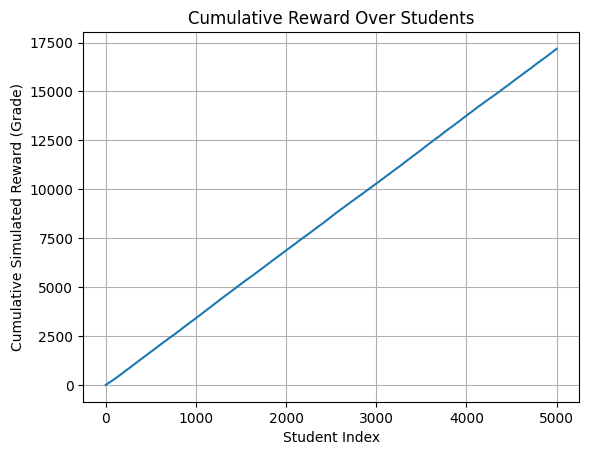

In [ ]:
# Run bandit for all students
agent = EpsilonGreedyAgent(n_arms=3, epsilon=0.1)
rewards = []

for i, student in df.iterrows():
    arm = agent.select_arm()
    reward = simulate_strategy(student, arm)
    agent.update(arm, reward)
    rewards.append(reward)


# Results
print("Average Reward per Arm:", np.round(agent.values, 2))
print("Number of Times Each Arm Was Chosen:", agent.counts.astype(int))

# Plot cumulative rewards
plt.plot(np.cumsum(rewards))
plt.title("Cumulative Reward Over Students")
plt.xlabel("Student Index")
plt.ylabel("Cumulative Simulated Reward (Grade)")
plt.grid(True)
plt.show()